In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"Brew Café.xlsx")
df

,Date,Time of Day,Service,Ad Spend ($),Conversions,Revenue ($),Customer Type
0,2024-03-21,Evening,Pastry,0.00,5,281.60,Returning
1,2024-04-01,Night,Coffee,0.00,8,179.21,New
2,2024-03-06,Morning,Tea,0.00,6,328.34,Returning
3,2024-04-11,Morning,Pastry,36.46,4,207.92,New
4,2024-01-21,Evening,Pastry,6.76,9,447.65,New
...,...,...,...,...,...,...,...
1995,2024-04-03,Night,Pastry,36.82,9,461.13,New
1996,2024-02-07,Morning,Tea,0.00,10,164.46,Returning
1997,2024-01-26,Night,Tea,15.46,1,37.50,Returning
1998,2024-01-15,Night,Pastry,0.00,1,52.96,New


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2000 non-null   object 
 1   Time of Day    2000 non-null   object 
 2   Service        2000 non-null   object 
 3   Ad Spend ($)   2000 non-null   float64
 4   Conversions    2000 non-null   int64  
 5   Revenue ($)    2000 non-null   float64
 6   Customer Type  2000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 109.5+ KB


In [4]:
df.describe()

,Ad Spend ($),Conversions,Revenue ($)
count,2000.000000,2000.00000,2000.00000
mean,13.631325,5.03800,189.13495
std,16.662623,3.12753,140.79120
min,0.000000,0.00000,0.00000
25%,0.000000,2.00000,78.80500
50%,0.000000,5.00000,164.51500
75%,28.052500,8.00000,276.25500
max,49.960000,10.00000,597.04000


In [5]:
df.isnull().sum()

Date             0
Time of Day      0
Service          0
Ad Spend ($)     0
Conversions      0
Revenue ($)      0
Customer Type    0
dtype: int64

In [6]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Date', 'Time of Day', 'Service', 'Customer Type'], dtype='object')

In [7]:
for col in cat_col :
    print(col)
    print(df[col].nunique) 
    print(df[col].unique) 
    print('*' * 100)

Date
<bound method IndexOpsMixin.nunique of 0       2024-03-21
1       2024-04-01
2       2024-03-06
3       2024-04-11
4       2024-01-21
           ...    
1995    2024-04-03
1996    2024-02-07
1997    2024-01-26
1998    2024-01-15
1999    2024-03-03
Name: Date, Length: 2000, dtype: object>
<bound method Series.unique of 0       2024-03-21
1       2024-04-01
2       2024-03-06
3       2024-04-11
4       2024-01-21
           ...    
1995    2024-04-03
1996    2024-02-07
1997    2024-01-26
1998    2024-01-15
1999    2024-03-03
Name: Date, Length: 2000, dtype: object>
****************************************************************************************************
Time of Day
<bound method IndexOpsMixin.nunique of 0       Evening
1         Night
2       Morning
3       Morning
4       Evening
         ...   
1995      Night
1996    Morning
1997      Night
1998      Night
1999    Morning
Name: Time of Day, Length: 2000, dtype: object>
<bound method Series.unique of 0       Evening
1 

In [8]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['Ad Spend ($)', 'Conversions', 'Revenue ($)'], dtype='object')

In [9]:
for n in num_col:
    print(n)
    print(df[n].unique)
    print('*' * 100)

Ad Spend ($)
<bound method Series.unique of 0        0.00
1        0.00
2        0.00
3       36.46
4        6.76
        ...  
1995    36.82
1996     0.00
1997    15.46
1998     0.00
1999     0.00
Name: Ad Spend ($), Length: 2000, dtype: float64>
****************************************************************************************************
Conversions
<bound method Series.unique of 0        5
1        8
2        6
3        4
4        9
        ..
1995     9
1996    10
1997     1
1998     1
1999     0
Name: Conversions, Length: 2000, dtype: int64>
****************************************************************************************************
Revenue ($)
<bound method Series.unique of 0       281.60
1       179.21
2       328.34
3       207.92
4       447.65
         ...  
1995    461.13
1996    164.46
1997     37.50
1998     52.96
1999      0.00
Name: Revenue ($), Length: 2000, dtype: float64>
**********************************************************************************

**Data Cleaning and Preprocessing**

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [11]:
text_columns = ['Time of Day', 'Service', 'Customer Type']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.title()

In [12]:
numeric_cols = ['Ad Spend ($)', 'Conversions', 'Revenue ($)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.isnull().sum()

Date             0
Time of Day      0
Service          0
Ad Spend ($)     0
Conversions      0
Revenue ($)      0
Customer Type    0
dtype: int64

In [14]:
df = df.dropna(subset=['Date'])

In [15]:
df[text_columns] = df[text_columns].fillna('Unknown')

In [16]:
df[numeric_cols] = df[numeric_cols].fillna(0)

In [17]:
df.duplicated().sum()

1

In [18]:
df = df.drop_duplicates()

In [19]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower, upper)  # تقليم بدل الحذف
    return data

for col in ['Ad Spend ($)', 'Conversions', 'Revenue ($)']:
    df = remove_outliers_iqr(df, col)

In [20]:
mask_wrong = (df['Revenue ($)'] == 0) & (df['Ad Spend ($)'] > 0)
print(" Number of rows with zero revenue despite expenditure:", mask_wrong.sum())

 Number of rows with zero revenue despite expenditure: 86


In [21]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [22]:
cleaned_path = "Brew_Café_Cleaned.xlsx"
df.to_excel(cleaned_path, index=False)
print(f"data: {cleaned_path}")

data: Brew_Café_Cleaned.xlsx


**Data Analysis**

In [23]:
plt.style.use('ggplot')
sns.set_palette("muted")

df = pd.read_excel("Brew_Café_Cleaned.xlsx")

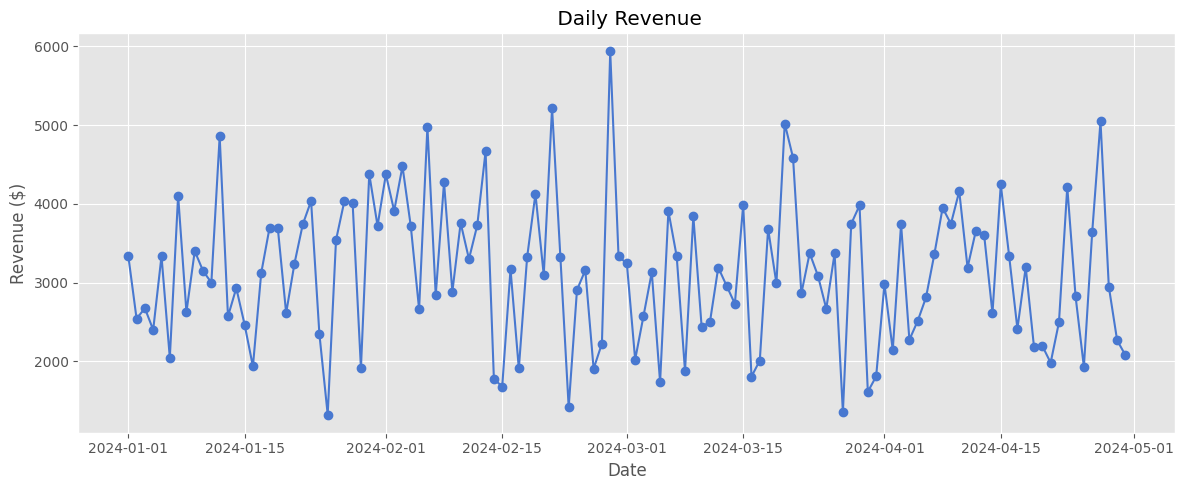

In [24]:
daily_revenue = df.groupby('Date')['Revenue ($)'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue ($)'], marker='o')
plt.title(' Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Monthly revenue analysis**

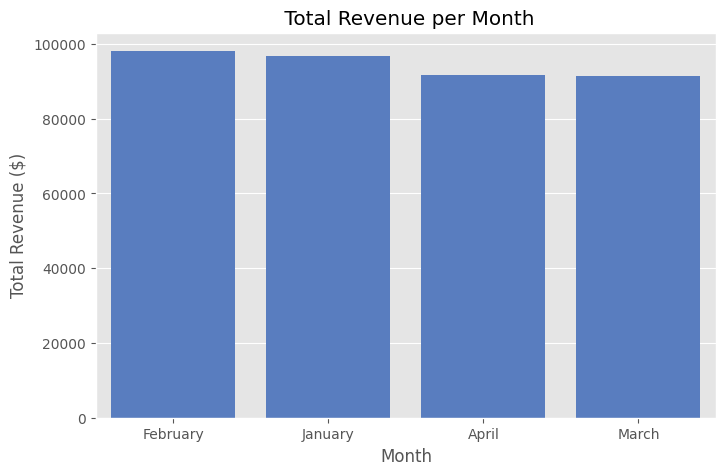

In [25]:
monthly_rev = df.groupby('Month')['Revenue ($)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_rev.index, y=monthly_rev.values)
plt.title(' Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.show()

**Peak time analysis (Morning / Evening / Night)**

In [26]:
print(df.columns.tolist())


['Date', 'Time of Day', 'Service', 'Ad Spend ($)', 'Conversions', 'Revenue ($)', 'Customer Type', 'Month', 'Day']


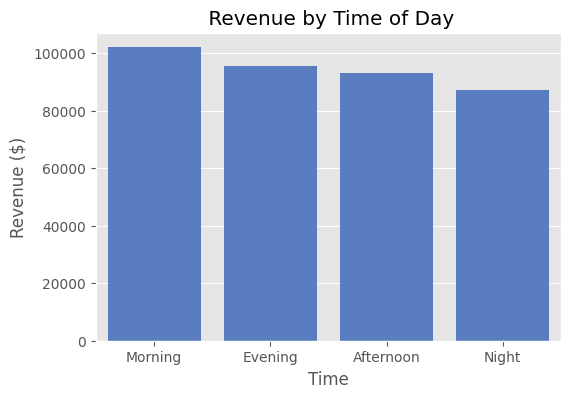

In [27]:
time_rev = df.groupby('Time of Day')['Revenue ($)'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=time_rev.index, y=time_rev.values)
plt.title(' Revenue by Time of Day')
plt.xlabel('Time')
plt.ylabel('Revenue ($)')
plt.show()

**Top Revenue-Generating Services**

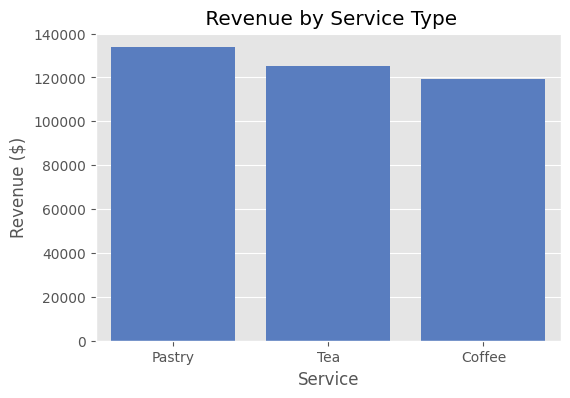

In [28]:
service_rev = df.groupby('Service')['Revenue ($)'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=service_rev.index, y=service_rev.values)
plt.title(' Revenue by Service Type')
plt.xlabel('Service')
plt.ylabel('Revenue ($)')
plt.show()

**Customer analysis (new vs returning)**

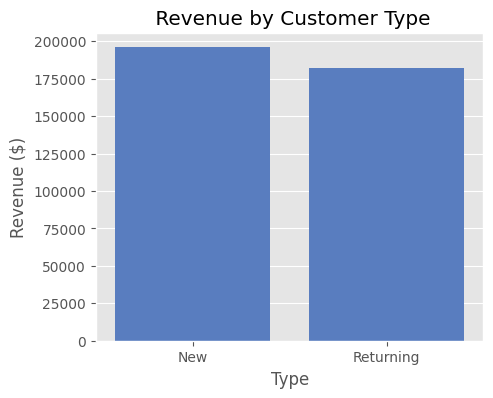

In [29]:
customer_rev = df.groupby('Customer Type')['Revenue ($)'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 4))
sns.barplot(x=customer_rev.index, y=customer_rev.values)
plt.title(' Revenue by Customer Type')
plt.xlabel('Type')
plt.ylabel('Revenue ($)')
plt.show()

**The relationship between advertising spending and revenue**

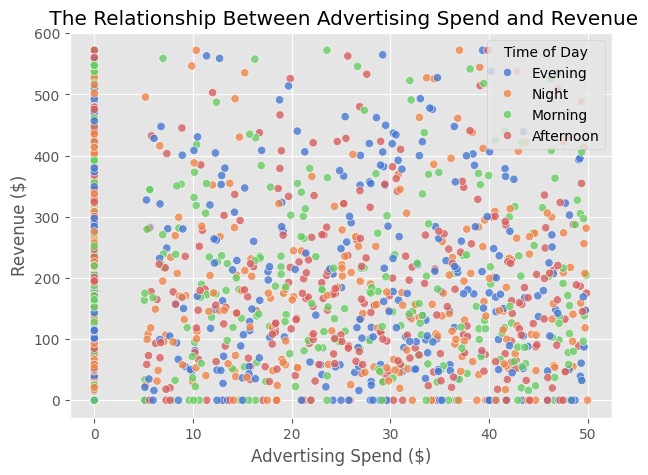

In [30]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Ad Spend ($)', y='Revenue ($)', hue='Time of Day', alpha=0.8)
plt.title(' The Relationship Between Advertising Spend and Revenue')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Revenue ($)')
plt.show()

**Most profitable days**

In [31]:
top_days = daily_revenue.sort_values(by='Revenue ($)', ascending=False).head(10)
print("Top 10 days in terms of revenue:")
print(top_days)

Top 10 days in terms of revenue:
          Date  Revenue ($)
58  2024-02-28      5936.45
51  2024-02-21      5218.32
117 2024-04-27      5049.91
79  2024-03-20      5021.65
36  2024-02-06      4980.02
11  2024-01-12      4857.85
43  2024-02-13      4668.32
80  2024-03-21      4587.24
33  2024-02-03      4478.15
29  2024-01-30      4380.06


**Revenue breakdown by day of the week**

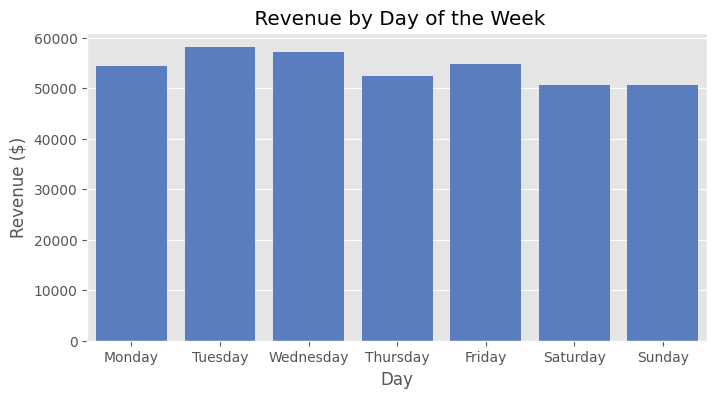

In [32]:
day_rev = df.groupby('Day')['Revenue ($)'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 4))
sns.barplot(x=day_rev.index, y=day_rev.values)
plt.title(' Revenue by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Revenue ($)')
plt.show()

In [33]:
summary_data = {
    'Daily Revenue': daily_revenue,
    'Monthly Revenue': monthly_rev,
    'Service Revenue': service_rev,
    'Customer Revenue': customer_rev,
    'Time of Day Revenue': time_rev,
    'Day of Week Revenue': day_rev
}

with pd.ExcelWriter("Brew_Café_EDA_Summary.xlsx") as writer:
    for sheet, data in summary_data.items():
        data.to_excel(writer, sheet_name=sheet)

print("The analysis summary was saved in the file: Brew_Café_EDA_Summary.xlsx")


The analysis summary was saved in the file: Brew_Café_EDA_Summary.xlsx


**Ml Model**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
df_ml = df.copy()

In [36]:
label_cols = ['Time of Day', 'Service', 'Customer Type']
le = LabelEncoder()
for col in label_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

In [37]:
X = df_ml[['Ad Spend ($)', 'Time of Day', 'Service', 'Customer Type', 'Conversions']]
y = df_ml['Revenue ($)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.622
MAE: 59.39
RMSE: 84.61


In [41]:
np.mean(y_test)

181.957975

In [42]:
np.mean(y_pred)

182.21275843888412

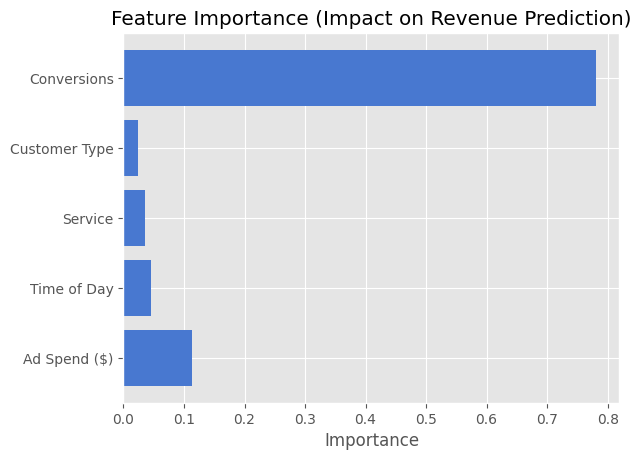

In [43]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.title("Feature Importance (Impact on Revenue Prediction)")
plt.xlabel("Importance")
plt.show()


In [44]:
import pickle

# بعد ما تدرّب الموديل (model.fit(...)) ضيف السطر ده
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl


In [45]:
import pickle

# تحميل الموديل من الملف
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!
